# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score,confusion_matrix,make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from sklearn.utils import resample
from imblearn.combine import SMOTETomek



In [ ]:
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
!pip install lightgbm
from lightgbm import LGBMClassifier

# **Reading the Dataset**

In [ ]:
df=pd.read_csv('/content/sample_data/creditcard.csv')
df_copy=df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Fraud-Non Fraud Visualization**

In [ ]:
occ = df['Class'].value_counts()
occ

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
ratio_cases = occ/len(df.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')


Ratio of fraudulent cases: 0.001727485630620034
Ratio of non-fraudulent cases: 0.9982725143693799


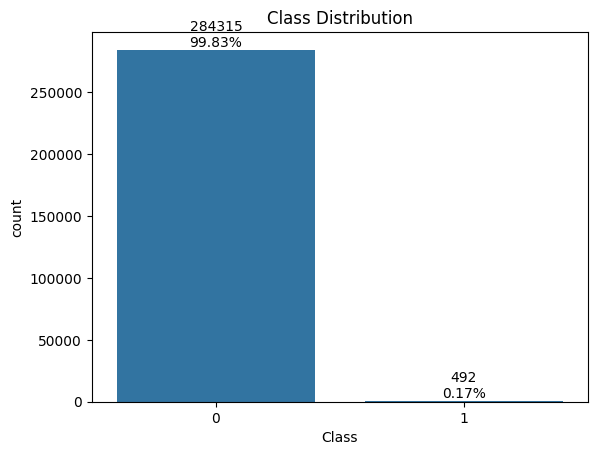

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x='Class', data=df, ax=ax)
ax.set_title('Class Distribution')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}\n{height/total:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()



In [ ]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):

    X = df.iloc[:, 1:30].values
    y = df.Class.values
    return X, y

In [ ]:
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

In [ ]:
X, y = prep_data(df)

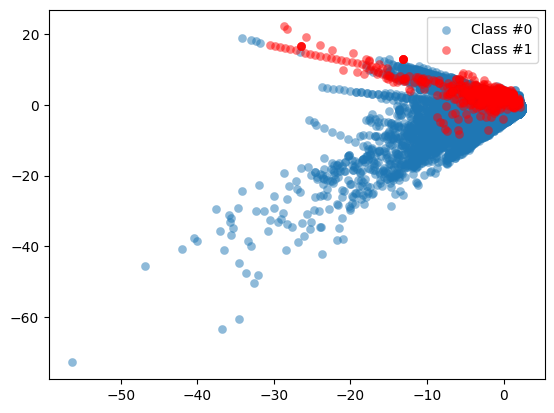

In [ ]:
plot_data(X, y)

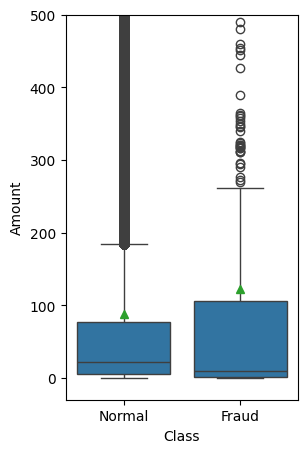

In [ ]:
fig, ax = plt.subplots(figsize=(3,5), sharex=True)

plt.ylim((-30,500))
plt.xticks([0, 1], ['Normal', 'Fraud'])

sns.boxplot(x=df.Class, y=df.Amount, showmeans=True, ax=ax)
plt.show()

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# **Scaling and Model Training without Sampling**

In [ ]:
X=df.drop("Class",axis=1)
y=df["Class"]

In [ ]:
std_scaler = StandardScaler()
df['std_amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['std_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)


In [ ]:
model1=LogisticRegression().fit(X_train,y_train)
model2=LGBMClassifier().fit(X_train,y_train)
model3=XGBClassifier().fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 356, number of negative: 199008
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.159789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001786 -> initscore=-6.326170
[LightGBM] [Info] Start training from score -6.326170


In [ ]:
def classification_performance_evaluation(key,preds):
  accuracy_scored = accuracy_score(y_test, preds)
  precision = precision_score(y_test, preds)
  recall = recall_score(y_test, preds)
  f1 = f1_score(y_test, preds)
  roc_auc = roc_auc_score(y_test, preds)

  print("*** Model: ", key , ' ***')
  print("accuracy_scored:", accuracy_scored)
  print("recall:", recall)
  print("precision:", precision)
  print("f1:", f1)
  print()

In [ ]:
models=[model1,model2,model3]

In [ ]:
for model in models:


  y_pred = model.predict(X_test)



  classification_performance_evaluation(model,y_pred)


*** Model:  LogisticRegression()  ***
accuracy_scored: 0.9988998513628969
recall: 0.6617647058823529
precision: 0.6521739130434783
f1: 0.656934306569343

*** Model:  LGBMClassifier()  ***
accuracy_scored: 0.9988998513628969
recall: 0.7941176470588235
precision: 0.6206896551724138
f1: 0.6967741935483871

*** Model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, 

# Accuracy is so high in all models however because of class imbalance in dataset, checking the recall value is more important. To increase this value, sampling methods can be used

# **Feature Selection**

In [ ]:
feature_importance=model3.feature_importances_
gbt_fi_df=pd.DataFrame({"Feature" : X.columns, "Importance": feature_importance})
gbt_fi_df=gbt_fi_df.sort_values(by="Importance",ascending=False)
gbt_fi_df

,Feature,Importance
14,V14,0.285963
7,V7,0.194785
10,V10,0.065364
12,V12,0.048260
4,V4,0.031508
17,V17,0.026058
27,V27,0.025571
1,V1,0.021061
16,V16,0.018698
29,Amount,0.017724


<Axes: xlabel='Feature', ylabel='Importance'>

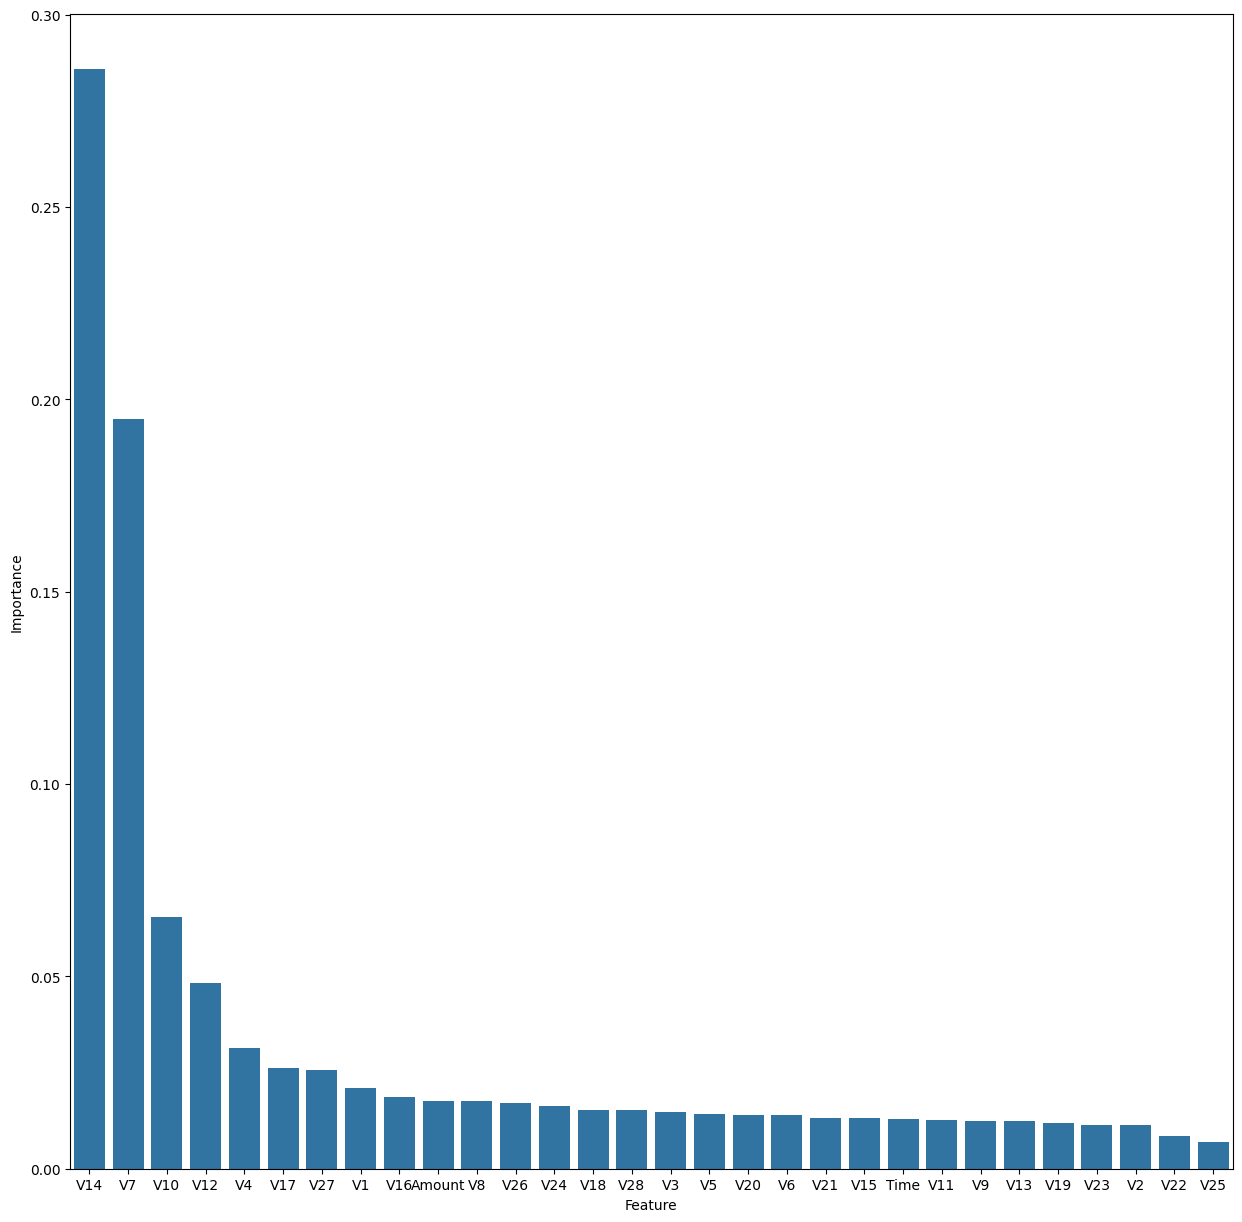

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(x="Feature",y="Importance", data=gbt_fi_df)

In [ ]:
Selected_Features=list(gbt_fi_df[gbt_fi_df["Importance"]>0.05].Feature)

In [ ]:
Selected_Features

['V14', 'V7', 'V10']

In [ ]:
Selected_Features.append("Class")

In [ ]:
df_new=df[Selected_Features]
df_new.head()

,V14,V7,V10,Class
0,-0.311169,0.239599,0.090794,0
1,-0.143772,-0.078803,-0.166974,0
2,-0.165946,0.791461,0.207643,0
3,-0.287924,0.237609,-0.054952,0
4,-1.119670,0.592941,0.753074,0


# **Resampling and Model Training**

In [ ]:
X=df_new.drop("Class",axis=1)
y=df_new["Class"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

# Since non-fraud cases are significantly more than fraud cases, Random Under Sampling method is used.

In [ ]:
rus=RandomUnderSampler(random_state=42)
X_train,y_train=rus.fit_resample(X_train,y_train)

In [ ]:
model3_new=XGBClassifier().fit(X_train,y_train)

In [ ]:
def classification_performance_evaluation(key,preds):
  accuracy_scored = accuracy_score(y_test, preds)
  precision = precision_score(y_test, preds)
  recall = recall_score(y_test, preds)
  f1 = f1_score(y_test, preds)
  roc_auc = roc_auc_score(y_test, preds)

  print("*** Model: ", key , ' ***')
  print("accuracy_scored:", accuracy_scored)
  print("recall:", recall)
  print("precision:", precision)
  print("f1:", f1)
  print()

In [ ]:
y_pred = model3_new.predict(X_test)

In [ ]:
classification_performance_evaluation(model3_new,y_pred)

*** Model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)  ***
accuracy_scored: 0.9384853059934694
recall: 0.9191176470588235
precision: 0.023277467411545624
f1: 0.04540501271340356



# Recall score increased after resampling methods

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[80062  5245]
 [   11   125]]
